In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random

16,INFO_PARKING_AREA_FOR_MOTORCARS
17,INFO_PEDESTRIAN_USE_CROSSING
20,INFO_START_OF_EXP_WAY
21,MANDATORY_GIVE_WAY
22,PROHIBITORY_NO_VEH_OVER_HEIGHT_4.5
24,WARNING_SLOW_SPEED
25,WARNING_ROAD_HUMP
27,INFO_ONE_WAY_RIGHT
28,INFO_ONE_WAY_LEFT
29,WARNING_SLOW_DOWN
30,WARNING_MERGE
31,PROHIBITORY_NO_RIGHT_TURN

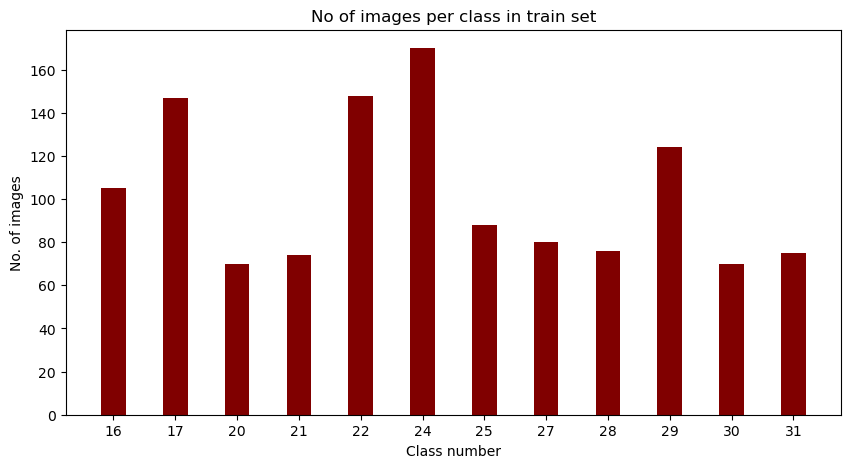

In [2]:
folder_path = "C:/D drive/2024_T7/SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION/SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION"
class_no = [16,17,20,21,22,24,25,27,28,29,30,31]

photos_count_train = [len(os.listdir(folder_path+"/TRAIN"+f"/{class_no[i]}")) for i in range(len(class_no))]
photos_count_test = [len(os.listdir(folder_path+"/TEST"+f"/{class_no[i]}")) for i in range(len(class_no))]
# print(photos_count_train)
# print(photos_count_test)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar([str(i) for i in class_no], photos_count_train, color ='maroon', 
        width = 0.4)

plt.xlabel("Class number")
plt.ylabel("No. of images")
plt.title("No of images per class in train set")
plt.show()

In [3]:
# classes that have <70 train
need_supp_classes_train = []
for idx, i in enumerate(photos_count_train):
    if i<70:
        need_supp_classes_train.append(class_no[idx])

# classes that have <10 test
need_supp_classes_test = []
for idx, i in enumerate(photos_count_test):
    if i<10:
        need_supp_classes_test.append(class_no[idx])

print(need_supp_classes_train)
print(need_supp_classes_test)

[20, 28, 30, 31]
[27]


## Augment dataset

In [15]:
# params
cls = 27
# folder_select = "/TRAIN"
folder_select = "/TEST"
img_to_make = 2

folder_path = "C:/D drive/2024_T7/SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION/SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION"
img_path = folder_path+folder_select+f"/{cls}/"
img_ls = os.listdir(img_path)

# random imgs
chosen_imgs = random.choices(img_ls, k=img_to_make)

for img in chosen_imgs:
    # plot img
    image = cv2.imread(img_path+img)
    # image = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
    height, width = image.shape[:2]

    # Source points (corners of the original image)
    src_points = np.float32([
        [0, 0],                # Top-left corner
        [width, 0],            # Top-right corner
        [width, height],       # Bottom-right corner
        [0, height]            # Bottom-left corner
    ])

    # Destination points for perspective transformation
    # Shrink the right edge (both top-right and bottom-right move leftwards)
    dst_1 = np.float32([
        [0, 0],                       # Top-left corner (no change)
        [width, 0.2*height],             # Move top-right towards the center
        [width, 0.8*height],        # Move bottom-right towards the center
        [0, height]                   # Bottom-left corner (no change)
    ])
    dst_2 = np.float32([
        [0, 0.2*height],                       # Top-left corner (no change)
        [width, 0],             # Move top-right towards the center
        [width, height],        # Move bottom-right towards the center
        [0, 0.8*height]                   # Bottom-left corner (no change)
    ])

    # skew img
    skew_type = random.choice([dst_1, dst_2])
    matrix = cv2.getPerspectiveTransform(src_points, skew_type)
    transformed_image = cv2.warpPerspective(image, matrix, (width, height))
    # plt.imshow(transformed_image)
    # plt.show()

    new_img_name = img.split(".")[0]+"_1.jpg"
    cv2.imwrite(folder_path+folder_select+f"/{cls}/"+new_img_name, transformed_image)
    print(f"Augmented {img} and saved as {new_img_name}.")

Augmented 1104.jpg and saved as 1104_1.jpg.
Augmented 3202.jpg and saved as 3202_1.jpg.


## Plot all road signs

#### Select one random img to represent each class

In [27]:
class_no = [0,1,3,5,7,8,9,10,11,12,13,14,15,16,17,20,21,22,24,25,27,28,29,30,31]
class_names = ["INFO_END_OF_EXP_WAY", "PROHIBITORY_NO_JAYWALKING", "PROHIBITORY_SPD_LIMIT_90", "WARNING_ERP", "INFO_U_TURN_LANE", "MANDATORY_SPLIT_WAY", "MANDATORY_STOP", "PROHIBITORY_SPD_LIMIT_50", "WARNING_CURVE_RIGHT_ALIGNMENT_MARKER", "INFO_ZEBRA_CROSSING", "INFO_RAIN_SHELTER", "PROHIBITORY_NO_ENTRY", "MANDATORY_KEEP_LEFT", "INFO_PARKING_AREA_FOR_MOTORCARS", "INFO_PEDESTRIAN_USE_CROSSING", "INFO_START_OF_EXP_WAY", "MANDATORY_GIVE_WAY", "PROHIBITORY_NO_VEH_OVER_HEIGHT_4.5", "WARNING_SLOW_SPEED", "WARNING_ROAD_HUMP", "INFO_ONE_WAY_RIGHT", "INFO_ONE_WAY_LEFT", "WARNING_SLOW_DOWN", "WARNING_MERGE", "PROHIBITORY_NO_RIGHT_TURN"]
img_list = []

folder_path = "C:/D drive/2024_T7/SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION/SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION"
folder_select = "/TRAIN"

for c in class_no:
    class_folder = folder_path+folder_select+f"/{c}"
    dir_ls = os.listdir(class_folder)

    # choose random image in the class folder
    img_list.append(f"/{c}/{random.choice(dir_ls)}")

print(len(img_list))

25


#### Plot every image

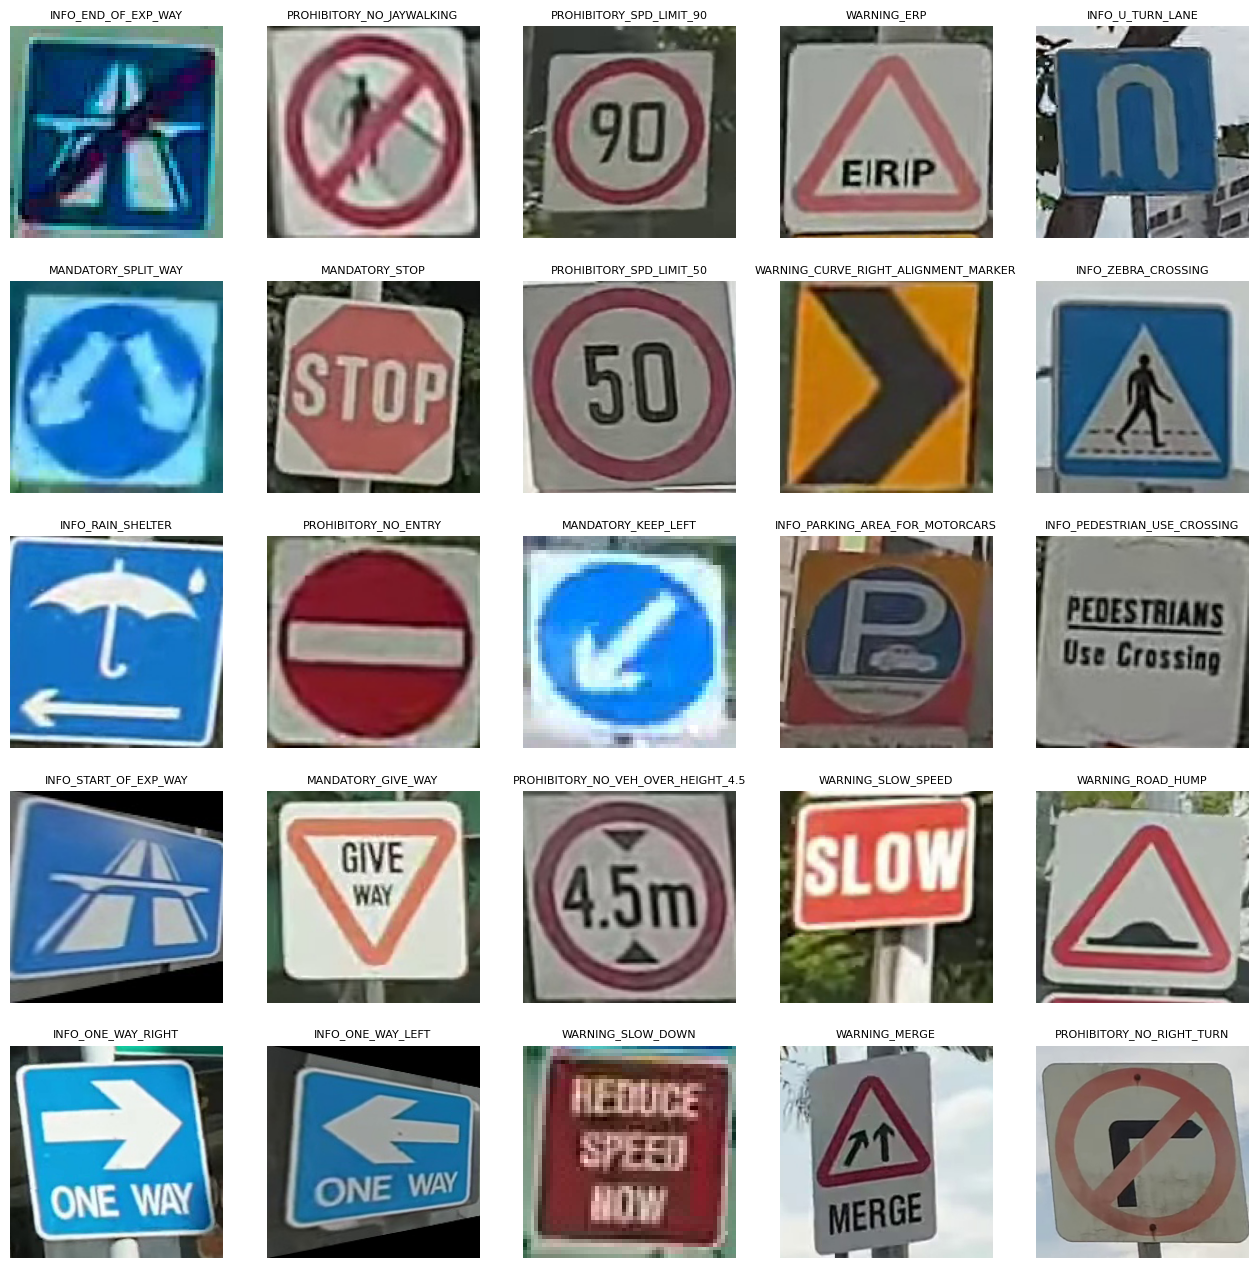

In [33]:
w = 10
h = 10
fig = plt.figure(figsize=(16, 16))
columns = 5
rows = 5
for i in range(columns*rows):
    # print(folder_path+folder_select+img_list[i])
    image = cv2.imread(folder_path+folder_select+img_list[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    fig.add_subplot(rows, columns, i+1)
    plt.axis("off")
    plt.title(class_names[i], fontsize=8)
    plt.imshow(image)
plt.show()